In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_set = pd.read_csv(r'mobile_addiction.csv')
data_set  #displaying the dataset

,Entry number,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed,addicted
0,0,2,29,0,0,49,0,44,5,3,35,not addicted
1,1,6,29,1,2,65,1,29,5,9,21,addicted
2,2,9,28,2,0,57,3,28,7,5,39,addicted
3,3,6,39,2,0,69,1,28,6,8,24,addicted
4,4,5,37,3,1,64,2,27,4,5,26,addicted
...,...,...,...,...,...,...,...,...,...,...,...,...
13584,13584,2,20,0,0,53,1,54,6,6,18,not addicted
13585,13585,4,18,0,1,60,0,21,6,0,30,not addicted
13586,13586,4,28,2,4,69,1,21,8,5,25,addicted
13587,13587,0,19,2,1,54,1,28,5,2,27,not addicted


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13589 entries, 0 to 13588
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Entry number        13589 non-null  int64 
 1   daily_screen_time   13589 non-null  int64 
 2   app_sessions        13589 non-null  int64 
 3   social_media_usage  13589 non-null  int64 
 4   gaming_time         13589 non-null  int64 
 5   notifications       13589 non-null  int64 
 6   night_usage         13589 non-null  int64 
 7   age                 13589 non-null  int64 
 8   work_study_hours    13589 non-null  int64 
 9   stress_level        13589 non-null  int64 
 10  apps_installed      13589 non-null  int64 
 11  addicted            13589 non-null  object
dtypes: int64(11), object(1)
memory usage: 1.2+ MB


In [4]:
data_set.describe()

,Entry number,daily_screen_time,app_sessions,social_media_usage,gaming_time,notifications,night_usage,age,work_study_hours,stress_level,apps_installed
count,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.000000,13589.00000,13589.000000,13589.000000
mean,6794.000000,3.768121,30.037604,1.545956,1.034219,60.015306,0.990213,33.055707,5.97807,4.265288,27.532048
std,3922.950739,1.897280,7.406585,1.204830,0.993172,12.732064,0.946606,10.118145,2.07139,2.288454,5.894790
min,0.000000,0.000000,8.000000,0.000000,0.000000,25.000000,0.000000,15.000000,0.00000,0.000000,10.000000
25%,3397.000000,2.000000,25.000000,1.000000,0.000000,50.000000,0.000000,25.000000,5.00000,3.000000,23.000000
50%,6794.000000,4.000000,30.000000,1.000000,1.000000,59.000000,1.000000,33.000000,6.00000,4.000000,27.000000
75%,10191.000000,5.000000,35.000000,2.000000,2.000000,70.000000,2.000000,41.000000,7.00000,6.000000,31.000000
max,13588.000000,12.000000,60.000000,7.000000,6.000000,103.000000,6.000000,55.000000,14.00000,10.000000,55.000000


In [5]:
data_set.isnull().sum() #no null values

Entry number          0
daily_screen_time     0
app_sessions          0
social_media_usage    0
gaming_time           0
notifications         0
night_usage           0
age                   0
work_study_hours      0
stress_level          0
apps_installed        0
addicted              0
dtype: int64

In [6]:
data_set.duplicated().sum() #no duplicates


np.int64(0)

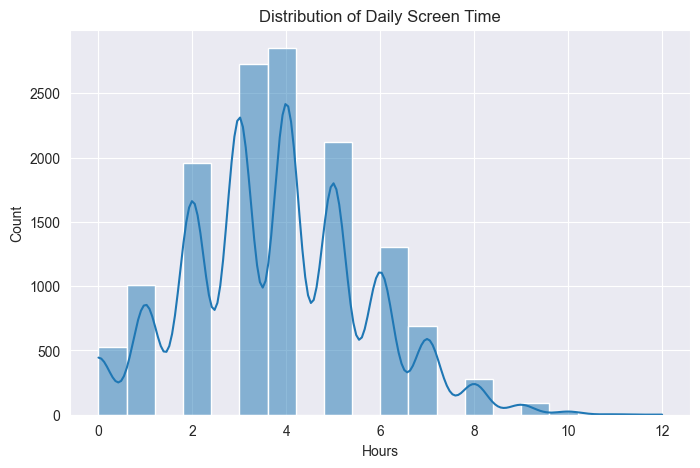

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.histplot(data_set['daily_screen_time'], bins=20, kde=True)
plt.title("Distribution of Daily Screen Time")
plt.xlabel("Hours")
plt.ylabel("Count")
plt.show()

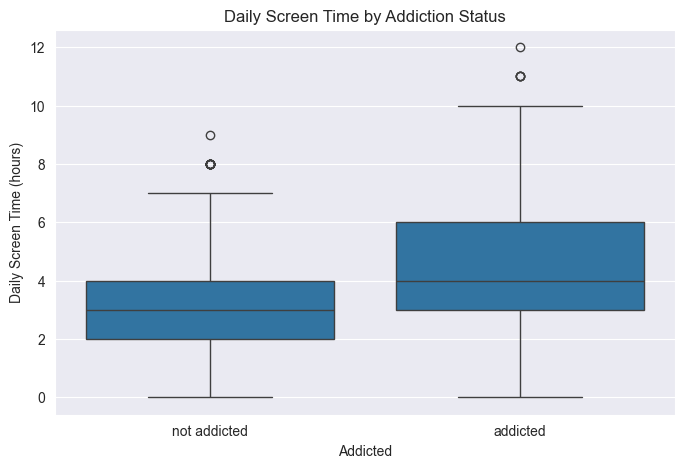

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='addicted', y='daily_screen_time', data=data_set)
plt.title("Daily Screen Time by Addiction Status")
plt.xlabel("Addicted")
plt.ylabel("Daily Screen Time (hours)")
plt.show()


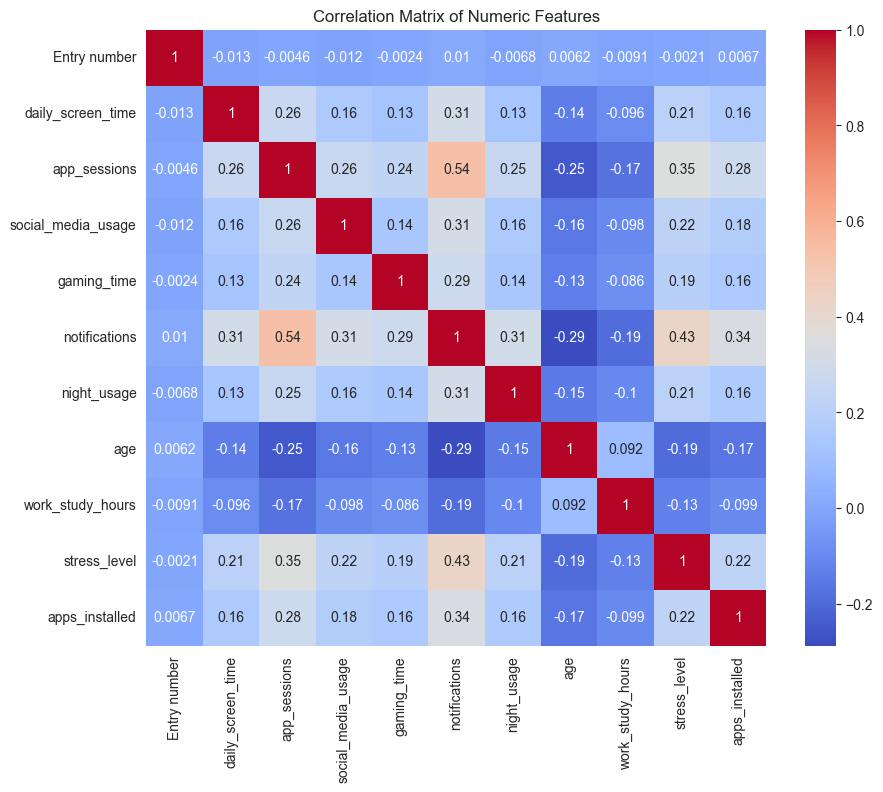

In [14]:
# Select only numeric columns
numeric_df = data_set.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numeric Features")
plt.show()


C:\Users\3bdel\AppData\Local\Temp\ipykernel_7084\1746594668.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='addicted', y='notifications', data=data_set, ci=None)


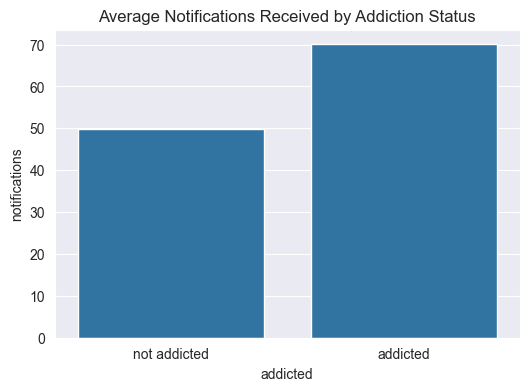

In [11]:
plt.figure(figsize=(6, 4))
sns.barplot(x='addicted', y='notifications', data=data_set, ci=None)
plt.title("Average Notifications Received by Addiction Status")
plt.show()


In [18]:
from scipy.stats import zscore

# Select only numeric columns
numeric_df = data_set.select_dtypes(include=['number'])

# Compute Z-scores
z_scores = np.abs(zscore(numeric_df))

# Identify outliers (Z-score > 3)
outliers = z_scores > 3

# Count outliers in each column
outlier_counts = pd.Series(outliers.sum(axis=0), index=numeric_df.columns)

# Total rows with at least one outlier
rows_with_outliers = outliers.any(axis=1).sum()

# Print results
print("Outliers per column:\n", outlier_counts)
print(f"\nTotal rows with at least one outlier: {rows_with_outliers} out of {len(data_set)}")

Outliers per column:
 Entry number            0
daily_screen_time      34
app_sessions           17
social_media_usage     23
gaming_time            16
notifications           5
night_usage           138
age                     0
work_study_hours        8
stress_level            0
apps_installed         32
dtype: int64

Total rows with at least one outlier: 271 out of 13589


In [20]:
# Select only numeric columns
numeric_df = data_set.select_dtypes(include=['number'])

# Compute Z-scores
z_scores = np.abs(zscore(numeric_df))

# Filter: keep rows where all Z-scores ≤ 3
df_no_outliers = data_set[(z_scores <= 3).all(axis=1)]

# Print the result
print(f"Original dataset size: {data_set.shape[0]} rows")
print(f"Dataset size after removing outliers: {df_no_outliers.shape[0]} rows")

# Optional: Save to a new CSV
df_no_outliers.to_csv("mobile_addiction_cleaned.csv", index=False)


Original dataset size: 13589 rows
Dataset size after removing outliers: 13318 rows
